<a href="https://colab.research.google.com/github/anushka190902/Predictive-Machinery-Maintenance/blob/main/copy_of_predictive_machinery_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
df=pd.read_csv("ai4i2020.csv")
print(df.head(10))
#HDF: Heat Dissipation Failure. PWF: Power Failure, OSF: Overstain Failure, RNF: Random Failure, TWF: Tool WEar Failure

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   
5    6     M14865    M                298.1                    308.6   
6    7     L47186    L                298.1                    308.6   
7    8     L47187    L                298.1                    308.6   
8    9     M14868    M                298.3                    308.7   
9   10     M14869    M                298.5                    309.0   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3       

In [ ]:
import matplotlib.pyplot as plt
x=df["Torque [Nm]"]
y=df["PWF"]
#plt.plot(x, y)
#plt.show()

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_2d = x.values.reshape(-1, 1)
x_train, x_test,y_train, y_test = train_test_split(x_2d, y,test_size=0.20,random_state=23)
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred)
k=classification_report(y_test, y_pred)
print("Classification Report: \n" ,k)
print("Logistic Regression model accuracy (in %):", acc*100)
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000

Logistic Regression model accuracy (in %): 99.05000000000001
Confusion Matrix :
[[1981    0]
 [  19    0]]


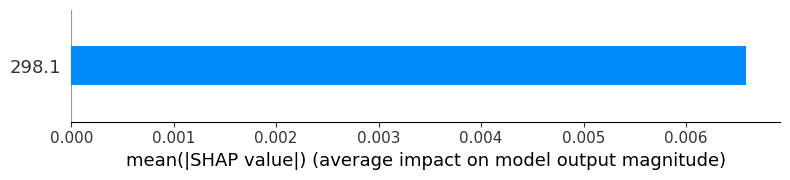

In [ ]:
import shap
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train, y_train)

# Save the XGBoost model in binary format
model.save_model('model.json')

# Load the model from the saved binary file
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('model.json')

# SHAP Explainer
explainer = shap.Explainer(loaded_model)
shap_values = explainer(x_test)
shap.summary_plot(shap_values, x, plot_type="bar")
#shap.summary_plot(shap_values, x_test, plot_type=&quot;bar&quot;)

In [ ]:
#XGBoost
xgb_train = xgb.DMatrix(x_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(x_test, y_test, enable_categorical=True)
n=50
params = {
	'objective': 'binary:logistic',
	'max_depth': 3,
	'learning_rate': 0.1,
}

model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=n)
preds = model.predict(xgb_test)
preds = preds.astype(int)
accuracy= accuracy_score(y_test,preds)
cf=classification_report(y_test, preds)

print('Accuracy of the model is:', accuracy*100)
print("Classification Report:\n",cf)
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))


Accuracy of the model is: 99.05000000000001
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000

Confusion Matrix :
[[1981    0]
 [  19    0]]


In [ ]:
#RANDOM f\FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print("Classification Report: \n",classification_report(y_test, y_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))



99.05000000000001
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.00      0.00      0.00        19

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.98      0.99      0.99      2000

Confusion Matrix :
[[1981    0]
 [  19    0]]
